In [1]:
# %load python_exercise_solution_ramani.py
# %load python_exercise_template.py
# import pandas, numpy
# Create the required data frames by reading in the files

import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
%matplotlib inline

df = pd.read_excel("SaleData.xlsx")

# Q1 Find least sales amount for each item
def least_sales(df):
    # write code to return pandas dataframe
    ls = df.groupby(["Item"])["Sale_amt"].min().reset_index()
    return ls

# Q2 compute total sales at each year X region
def sales_year_region(df):
    # write code to return pandas dataframe
    copy_df=df.copy()
    copy_df['Year']=copy_df['OrderDate'].apply(lambda x: x.year)
    sal=copy_df.groupby(['Year','Region'])['Sale_amt'].sum()
    return sal

# Q3 append column with no of days difference from present date to each order date
def days_diff(df):
    # write code to return pandas dataframe
    mod_df=df.copy()
    dateFormat="%Y-%m-%d"
    t=datetime.strptime(str(datetime.today().strftime(dateFormat)),dateFormat)
    mod_df['days_diff']=mod_df['OrderDate'].apply(lambda x : (t-x).days)
    return mod_df


# Q4 get dataframe with manager as first column and  salesman under them as lists in rows in second column.
def mgr_slsmn(df):
    # write code to return pandas dataframe
    grouped_df=df.groupby(['Manager','SalesMan']).describe()
    grouped_df.drop(columns=['Units','Unit_price','Sale_amt'],inplace=True)
    return grouped_df


# Q5 For all regions find number of salesman and number of units
def slsmn_units(df):
    # write code to return pandas dataframe
    slsmn=df.groupby('Region').agg({'SalesMan':'count','Units':'sum'}).reset_index().rename(columns={'SalesMan':'salesman_count','Units':'total_sales'})
    return slsmn

# Q6 Find total sales as percentage for each manager
def sales_pct(df):
    # write code to return pandas dataframe
    total_sales=df.groupby('Manager').agg({'Sale_amt':'sum'}).rename(columns={'Sale_amt':'percent_sales'})
    total_sales=round(total_sales/total_sales.sum()*100,2)
    return total_sales

# To read the 'imdb.csv'
df= pd.read_csv("imdb.csv",escapechar="\\")

# Q7 get imdb rating for fifth movie of dataframe
def fifth_movie(df):
	# write code here
    val=df[df['type']=='video.movie'].reset_index().iloc[4]['imdbRating']
    return val

# Q8 return titles of movies with shortest and longest run time
def movies(df):
	# write code here
    df1=df[df['type']=='video.movie'].reset_index()
    mlist=df1[(df1['duration'].min()==df1['duration']) |(df1['duration'].max()==df1['duration'])]['title']
    return mlist

# Q9 sort by two columns - release_date (earliest) and Imdb rating(highest to lowest)
def sort_df(df):
	# write code here
    sort=df.sort_values(by=['year','imdbRating'],ascending=[True,False])
    return sort

# Q10 subset revenue more than 2 million and spent less than 1 million & duration between 30 mintues to 180 minutes
def subset_df():
	# write code here
    df= pd.read_csv("movie_metadata.csv")
    subset=df[(df['duration']>30) & (df['duration']<180) & (df['gross']>2000000) & (df['budget']<1000000)]
    return subset

#To read diamond data set

df = pd.read_csv("diamonds.csv")

# Q11 count the duplicate rows of diamonds DataFrame.
def dupl_rows(df):
	# write code here
    dup_count=len(df[df.duplicated(subset=None)])
    return dup_count
    

# Q12 droping those rows where any value in a row is missing in carat and cut columns
def drop_row(df):
	# write code here
    df=df.dropna(axis=0,how='any',subset=['carat','cut'],inplace=True)
    return df


# Q13 subset only numeric columns
def sub_numeric(df):
	# write code here
    df['carat']=pd.to_numeric(df['carat'],errors='coerce')
    df['z']=pd.to_numeric(df['z'],errors='coerce')
    new_df=df.select_dtypes(include=np.number)
    return new_df


# Q14 compute volume as (x*y*z) when depth > 60 else 8
def volume(df):
	# write code here
    df['volume']=df.apply(calc,axis=1)
    return df

def calc(row): 
        if row['depth']<60:
            return 8
        else:
            x=pd.to_numeric(row['x'],errors='coerce')
            y=pd.to_numeric(row['y'],errors='coerce')
            z=pd.to_numeric(row['z'],errors='coerce')
            return round(x*y*z,3)
        

# Q15 impute missing price values with mean
def impute(df):
	# write code here
    df['price'].fillna(df['price'].mean(),inplace=True)

# Bonus Question
#Q1
def report1(df):
    df1 = df.groupby('year').sum()
    df1.drop(df1.iloc[:, 0:9],axis=1,inplace=True)
    df1['genre_combo'] = df1.apply(lambda x: '|'.join(x.index[x>= 1]), axis=1)
    res1=df.groupby(['year','type'])['imdbRating'].agg([('avg_rating','mean'),('min_rating','min'),('max_rating','max')])
    res2=df.groupby(['year','type'])['duration'].agg([('total_run_time_mins','sum')])
    mer=pd.merge(res1,res2,on=['year','type'])
    df1.reset_index()
    mer=pd.merge(mer,df1['genre_combo'],on=['year'])
    return mer

#Bonus Question
#Q2

def report2(df):
    df1=df.copy()

    df1['title_len']=df1['title'].str.len()
    df2=df1.groupby('year')['title_len'].agg([('min_length','min'),('max_length','max')])
    df3=df1.groupby('year')['title_len'].describe(percentiles=[0.25,0.5,0.75]).drop(['count','mean','std','min','max'],axis=1).reset_index()
    df4= pd.merge(df2,df3,on='year')
    df4= pd.merge(df1,df4,on='year')
    df4['num_25']=(df4['title_len']<df4['25%'])*1
    df4['num_25_50']=((df4['title_len']>=df4['25%'])&(df4['title_len']<=df4['50%']))*1
    df4['num_50_75']=((df4['title_len']>df4['50%'])&(df4['title_len']<=df4['75%']))*1
    df4['num_75']=(df4['title_len']>df4['75%'])*1

    mer=df4.groupby('year')['num_25','num_25_50','num_50_75','num_75'].agg([('count','sum')])
    res=pd.merge(df2,mer,on='year').reset_index()
    res.columns=['year','min_length','max_length',' num_videos_less_than25Percentile','num_videos_25_50Percentile ','num_videos_50_75Percentile','num_videos_greaterthan75Precentile']
    return res


#Bonus Question
#Q3

def report3(df):
    df['bins']=pd.qcut(df['volume'],q=4)
    cross=pd.crosstab(df.bins, df.cut, normalize="all").round(4)*100
    return cross


#Bonus Question
#Q4
def report4(df): 
    df1=df.groupby('title_year')['gross'].sum().reset_index()
    df1['gross_10']=df1['gross']*0.1
    df1.drop(columns=['gross'],inplace=True)
    df=pd.merge(df,df1,how='inner',on='title_year')
    df=df[df['gross'] > df['gross_10']].reset_index()
    df2=df.groupby('title_year')['imdb_score'].mean().reset_index()
    df2.rename(columns={'imdb_score':'avg_imdb_score_top_10_movies'},inplace=True)
    
    df.genres=df.genres.str.split('|')
    New_df=pd.DataFrame({'genres':np.concatenate(df.genres.values),'movie_title':df.movie_title.repeat(df.genres.apply(len))})
    New_df=New_df.groupby('genres').count()
    New_df.rename(columns={'movie_title':'Top_movies_count'},inplace=True)
    
    return df2,New_df

#Bonus Question
#Q5
def report5(df):
    df['deciles']=pd.qcut(df['duration'],10,labels=False)
    df.dropna(axis=0,how='any',subset=['deciles'],inplace=True)
    df.deciles=df.deciles.astype(int)
    df.drop(columns=['imdbRating','ratingCount','duration','year','nrOfPhotos','nrOfNewsArticles','nrOfUserReviews','nrOfGenre'],axis=1,inplace=True)
    df1=df.groupby('deciles').sum()
    df2=df1.drop(columns=['nrOfWins','nrOfNominations'],axis=1)

    df3=df.groupby('deciles')['title'].count()
    df1=pd.merge(df1,df3, on='deciles')



    def get_n_largest_ind(a,n):
        ind = np.argpartition(a, -n)[-n:]
        return ind[0]

    cols = df2.columns
    for n in [1,2,3]:
        df1["top{}".format(n)] = df1[cols].apply(lambda x: cols[get_n_largest_ind(x,n)],axis=1)

    df1=df1.drop(df1.iloc[:, 2:30],axis=1)
    df1.columns=(['nrOfWins','nrOfNominations','count','top1','top2','top3'])
    return df1

#Bonus Question
#Q6
def report6():
    df= pd.read_csv("movie_metadata.csv")
    df[['content_rating','movie_title']].groupby('content_rating').count().plot(kind='bar', title='Content Rating Plot')
    plt.xlabel('Content Rating')
    plt.ylabel('Title Count')
    
    plt.tight_layout()
    plt.show()
    
    #Top 5 directors with most movies
    df['director_name'].value_counts()[:5].sort_values(ascending=False)
    
    df= pd.read_csv("imdb.csv",escapechar="\\")
    
    df.groupby('type')['title'].count().plot(kind='pie',title='Type Visualization',autopct='%1.1f%%')
    plt.axis('equal')

    plt.tight_layout()
    plt.show()
    
    df.groupby('type')['nrOfWins','nrOfNominations'].sum().plot(kind='bar',title='Type Visualization')

    plt.tight_layout()
    plt.show()
    return

    
    


In [2]:
df = pd.read_excel("SaleData.xlsx")

In [3]:
least_sales(df)

,Item,Sale_amt
0,Cell Phone,3375.0
1,Desk,250.0
2,Home Theater,2000.0
3,Television,8386.0
4,Video Games,936.0


In [4]:
sales_year_region(df)

Year  Region 
2018  Central    479825.0
      East       293780.0
      West       105424.0
2019  Central    349944.5
      East        27227.0
      West        49475.0
Name: Sale_amt, dtype: float64

In [5]:
days_diff(df)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,days_diff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,738
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,721
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,704
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,687
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,670
5,2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0,653
6,2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0,636
7,2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0,619
8,2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0,602
9,2018-06-08,East,Martha,Alexander,Home Theater,60,500.0,30000.0,585


In [6]:
mgr_slsmn(df)

Empty DataFrame
Columns: []
Index: [(Douglas, John), (Douglas, Karen), (Douglas, Michael), (Hermann, Luis), (Hermann, Shelli), (Hermann, Sigal), (Martha, Alexander), (Martha, Diana), (Martha, Steven), (Timothy, David), (Timothy, Stephen)]

In [7]:
slsmn_units(df)

,Region,salesman_count,total_sales
0,Central,24,1199
1,East,13,691
2,West,6,231


In [8]:
sales_pct(df)

,percent_sales
Manager,
Douglas,18.31
Hermann,27.96
Martha,36.19
Timothy,17.54


In [9]:
df= pd.read_csv("imdb.csv",escapechar="\\")

In [10]:
fifth_movie(df)

8.7

In [11]:
movies(df)

2016                  Daii jan Napelon (1976)
10295    Traffic Crossing Leeds Bridge (1888)
Name: title, dtype: object

In [12]:
sort_df(df)

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
14013,titles04/index.html.8647,tt0392728,Roundhay Garden Scene (1888),roundhay garden scene,http://www.imdb.com/title/tt0392728/,7.8,2931.0,NaN,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
13682,titles04/index.html.8070,tt0343112,Traffic Crossing Leeds Bridge (1888),traffic crossing leeds bridge,http://www.imdb.com/title/tt0343112/,7.2,1442.0,2.0,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
14125,titles04/index.html.8877,tt0416046,"Monkeyshines, No. 2 (1890)",monkeyshines no,http://www.imdb.com/title/tt0416046/,5.4,383.0,NaN,1890.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6909,titles04/index.html,tt0000005,Blacksmith Scene (1893),blacksmith scene,http://www.imdb.com/title/tt0000005/,6.3,1039.0,60.0,1893.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
12691,titles04/index.html.6501,tt0177707,Dickson Experimental Sound Film (1894),dickson experimental sound film,http://www.imdb.com/title/tt0177707/,6.8,965.0,22.0,1894.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,titles04/index.html.13318,tt1922570,Icarus Factor,icarus factor,http://www.imdb.com/title/tt1922570/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,1,0,0
8907,titles04/index.html.13388,tt1965235,Thomas the Tank Engine,thomas the tank engine,http://www.imdb.com/title/tt1965235/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0
9388,titles04/index.html.14214,tt2761156,"Patrik, Age 1.5",patrik age,http://www.imdb.com/title/tt2761156/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0
14485,titles04/index.html.9493,tt0472429,Voltron,voltron,http://www.imdb.com/title/tt0472429/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [13]:
subset_df()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,826.0,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0
3821,Color,Billy Bob Thornton,104.0,148.0,0.0,263.0,Dwight Yoakam,3000.0,24475416.0,Drama,...,309.0,English,USA,R,890000.0,1996.0,324.0,8.0,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,404.0,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,36.0,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265
5008,Black and White,Kevin Smith,136.0,102.0,0.0,216.0,Brian O'Halloran,898.0,3151130.0,Comedy,...,615.0,English,USA,R,230000.0,1994.0,657.0,7.8,1.37,0
5011,Color,Neil LaBute,80.0,97.0,119.0,7.0,Matt Malloy,136.0,2856622.0,Comedy|Drama,...,197.0,English,Canada,R,25000.0,1997.0,108.0,7.3,1.85,489


In [13]:
report1(df)

,avg_rating,min_rating,max_rating,total_run_time_mins,genre_combo
year,,,,,
1888.0,7.500000,7.2,7.8,2.0,Documentary|Short
1890.0,5.400000,5.4,5.4,0.0,Short
1893.0,6.300000,6.3,6.3,60.0,Short
1894.0,6.800000,6.8,6.8,22.0,Short
1899.0,5.900000,5.9,5.9,60.0,Comedy|Romance|Short
...,...,...,...,...,...
2014.0,7.430769,5.3,9.4,39900.0,Action|Adventure|Animation|Comedy|Crime|Docume...
2015.0,NaN,NaN,NaN,0.0,Action|Adventure|Animation|Biography|Drama|Fam...
2015.0,NaN,NaN,NaN,0.0,Action|Adventure|Animation|Biography|Drama|Fam...


In [14]:
report2(df)

/home/tiger0508/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,year,min_length,max_length,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile
0,1888.0,28,36,1,0,0,1
1,1890.0,26,26,0,1,0,0
2,1893.0,23,23,0,1,0,0
3,1894.0,38,38,0,1,0,0
4,1899.0,29,29,0,1,0,0
...,...,...,...,...,...,...,...
112,2013.0,9,97,122,126,122,122
113,2014.0,11,106,26,40,31,32
114,2015.0,14,49,2,2,2,2
115,2016.0,16,16,0,1,0,0


In [15]:
report5(df)

,nrOfWins,nrOfNominations,count,top1,top2,top3
deciles,,,,,,
0,3349,7928,2083,Comedy,Short,Animation
1,1912,4923,675,Drama,Documentary,Comedy
2,3730,8946,1368,Comedy,Drama,TalkShow
3,2740,3128,1740,Comedy,Drama,Horror
4,2511,3109,1212,Comedy,Drama,Crime
5,3253,3981,1275,Drama,Comedy,Crime
6,4632,5713,1387,Drama,Comedy,Action
7,5473,6470,1346,Drama,Comedy,Action
8,7999,9667,1325,Drama,Comedy,Action


In [16]:
df = pd.read_csv("diamonds.csv")

In [17]:
dupl_rows(df)

149

In [18]:
drop_row(df)

In [19]:
sub_numeric(df)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53938,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53939,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53940,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53941,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


In [20]:
volume(df)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.725
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917
...,...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110
53940,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.450
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,140.766


In [21]:
impute(df)

In [22]:
report3(df)

cut,Fair,Good,Ideal,Premium,Very Good
bins,,,,,
"(-0.001, 54.347]",0.53,2.68,8.59,7.09,6.12
"(54.347, 94.067]",0.29,1.66,13.55,5.10,4.39
"(94.067, 165.441]",1.40,3.15,8.12,5.53,6.81
"(165.441, 838.502]",0.76,1.61,9.69,7.85,5.08


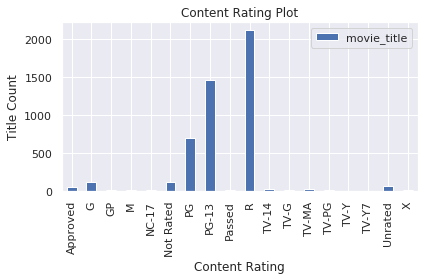

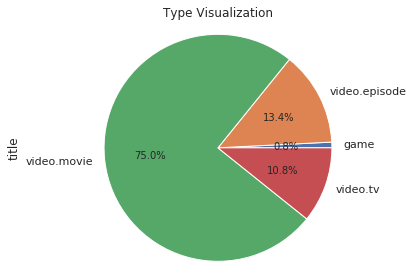

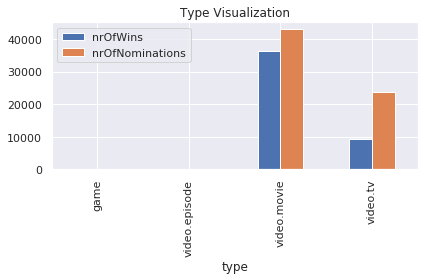

In [23]:
report6()

In [24]:
df= pd.read_csv("movie_metadata.csv")

In [25]:
report4(df)

(    title_year  avg_imdb_score_top_10_movies
 0       1920.0                      4.800000
 1       1927.0                      8.300000
 2       1929.0                      6.300000
 3       1933.0                      7.700000
 4       1935.0                      7.800000
 5       1936.0                      8.600000
 6       1937.0                      7.700000
 7       1939.0                      8.150000
 8       1940.0                      7.650000
 9       1942.0                      7.400000
 10      1946.0                      7.500000
 11      1947.0                      7.700000
 12      1948.0                      7.100000
 13      1950.0                      7.000000
 14      1952.0                      6.700000
 15      1953.0                      6.750000
 16      1954.0                      8.200000
 17      1957.0                      8.200000
 18      1959.0                      8.300000
 19      1960.0                      8.500000
 20      1961.0                   